## Proprocessing

In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

# Assuming df is your DataFrame and 'output' is the column you want to fill
# Also assuming model is your trained XGBRegressor model

model = XGBClassifier()
model.load_model('../model/xgboost_model.json')
data = pd.read_csv('../data/sp500_backtest_regime_for_preprocessing.csv')
data.drop('color', axis=1, inplace=True)
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
regimes = pd.DataFrame(index=data.index,columns=['regime'])
for i in data.index:
    # Get the input features for the current row
    # Reshape the input features to a 2D array, as required by the predict method

    # Use the model to predict the output variable
    prediction = model.predict(data.loc[i].values.reshape(1, -1))
    
    # Update the DataFrame with the predicted value
    regimes.loc[i,'regime'] = prediction[0]


In [3]:
# 0: blue
# 1: green
# 2: pink
# 3: red

replacements = {
    0: 'blue',
    1:'green',
    2: 'pink',
    3: 'red'
}

# Replace the values in the column
regimes['regime'] = regimes['regime'].replace(replacements)

regimes.head()

,regime
Date,
1979-08-01,blue
1979-08-02,blue
1979-08-03,blue
1979-08-06,blue
1979-08-07,blue


In [4]:
#combine regime and data

data = pd.merge(regimes,data, on='Date', how='inner')

In [5]:
data['regime'] = data['regime'].shift(1)
data.dropna(inplace=True)
data2=data[['regime','Volume','Open','High','Low','Close']]

In [6]:
data2.to_csv('../data/backtest_data_after_regime_prediction.csv')


/Users/alden/quantfin/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


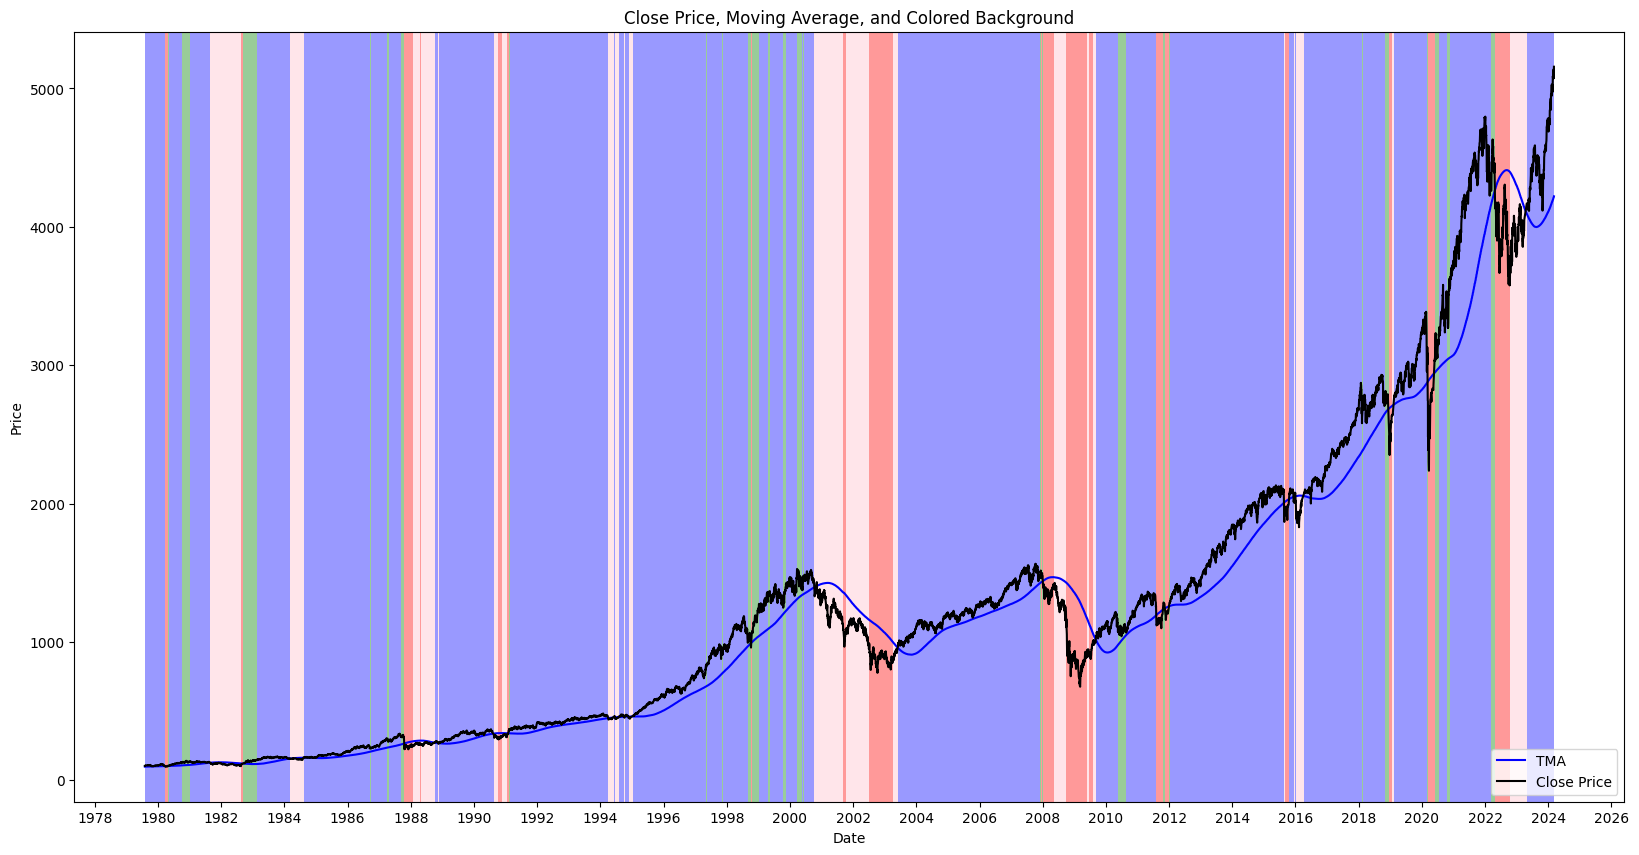

In [7]:
#green = bullish + high variance
#blue = bullish + low variance
#purple = bearish + low variance
#red = bearish + high variance
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.patches import Patch


plt.figure(figsize=(20, 10))
plt.plot(data.index, data['TMA'], label='TMA', color='blue') 
plt.plot(data.index, data['Close'], label='Close Price', color='black') 

for i, row in data.iterrows():
    start_date = i
    end_date = data.index[data.index.get_loc(i) + 1] if i != data.index[-1] else i
    bg_color = row['regime']

    plt.axvspan(start_date, end_date, facecolor=bg_color, alpha=0.4)

plt.title('Close Price, Moving Average, and Colored Background')
plt.xlabel('Date')
plt.ylabel('Price')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.show()